<a href="https://colab.research.google.com/github/KieuSonTung/Data_Preparation/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

# Visualize data

In [63]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [65]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


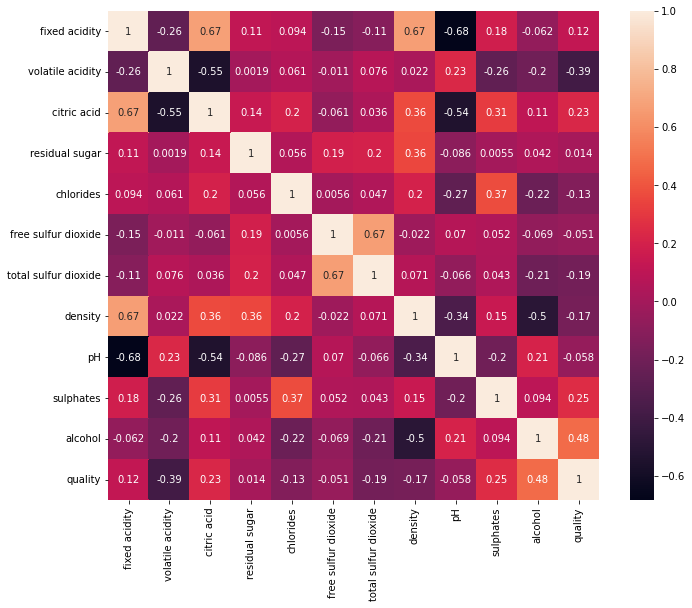

In [71]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), annot=True)

# Split data

In [73]:
X = df.drop(columns='quality')
Y = df['quality']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Train the model

In [97]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
print('w: ' + str(reg.coef_))
print('w0: ' + str(reg.intercept_))

w: [ 2.18600313e-02 -1.00869523e+00 -1.33904164e-01  8.85944150e-03
 -1.75557840e+00  5.00853894e-03 -3.65426072e-03 -1.62236478e+01
 -3.43939544e-01  8.19819425e-01  2.86228187e-01]
w0: 20.02891736013945


In [89]:
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

# Evaluate the model

In [100]:
from sklearn import metrics

print('MSE:', metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
print('R-squared with the train set: ', metrics.r2_score(Y_train, Y_train_pred))
print('R-squared with the test set: ', metrics.r2_score(Y_test, Y_test_pred))

MSE: 0.3883017386867004
RMSE: 0.6231386191584505
R-squared with the train set:  0.3548528745208318
R-squared with the test set:  0.37228312008212106
